In [181]:
import pandas as pd
import json
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import os

In [182]:
nb_offers = {
    'AWS': 2218,
    'Scaleway': 133,
    'GCP': 3320,
    'Azure': 8412,
    'python': 14147,
    'node.js': 2221,
    'react.js': 1458,
    'vue.js': 1595,
    'java': 12171,
}

In [183]:
def load_data(filename):
    with open(f'./outputs/{filename}', 'r') as f:
        data = json.load(f)
    
    # Collect job offers
    jobs = pd.DataFrame(data['jobs'])
    if "companiesUrls" in data:
        jobs['companyUrl'] = data['companiesUrls']
    else:
        # temp fix
        jobs['companyUrl'] = "https://fr.indeed.com/cmp/" + jobs['company'].str.replace(' ', '-')
    
    # Enrich with companies data (add a collect attribute to all of them to avoid from_dict skipping empty elements)
    companies_json = {k: {'collected': True, **v} for k, v in data['companies'].items()}
    companies = pd.DataFrame.from_dict(companies_json, orient='index')
    df = jobs.join(companies, on='companyUrl', how='left')
    
    df['csp'] = data['csp']
    df['country'] = data['country']
    df['techno'] = data['csp'] in ["python", "java", "node.js", "vue.js", "react.js"]
    return df

In [184]:
pd.DataFrame.from_dict({
    'id1': {},
    'id2': { 'test': True }
}, orient='index')

,test
id2,True


In [200]:
dfs = []
for filename in tqdm(os.listdir('./outputs')):
    df = load_data(filename)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df

  0%|          | 0/7 [00:00<?, ?it/s]

,title,summary,url,company,location,postDate,salary,isEasyApply,companyUrl,collected,headquarters,employees,revenue,csp,country,techno
0,nouveauDéveloppeur ou Développeuse Node.js R&D...,JS curieux ou curieuse des nouvelles technos e...,https://fr.indeed.com/rc/clk?jk=841e1031b09b71...,Klaxoon,Télétravail in 35000 Rennes,PostedPublié à l'instant,,False,https://fr.indeed.com/cmp/Klaxoon,True,Rennes,51 à 200,NaN,node.js,fr,True
1,nouveauLead développeur H/F, Accompagnement et partage des savoir-faire a...,https://fr.indeed.com/rc/clk?jk=d0e2264b71b82b...,Leihia,Le Fossat (09)+ 9 lieux,PostedPublié à l'instant,À partir de 40 000 € par an,False,None,NaN,NaN,NaN,NaN,node.js,fr,True
2,nouveauDéveloppeur ou Développeuse FullStack J...,Contribuer aux développements de notre platefo...,https://fr.indeed.com/rc/clk?jk=cba2d021d85963...,Klaxoon,Télétravail in 35000 Rennes,PostedPublié à l'instant,,False,None,NaN,NaN,NaN,NaN,node.js,fr,True
3,nouveauPRODUCT OWNER (H/F),Le Groupe Solutions 30 est le partenaire privi...,https://fr.indeed.com/rc/clk?jk=7df3057fefec29...,SOLUTIONS 30,Saint-Denis (93),PostedPublié à l'instant,De 35 000 € à 45 000 € par an,False,https://fr.indeed.com/cmp/Solutions30-1,True,Slachthuislaan 78\r\n2060 Antwerpen,201 à 500,NaN,node.js,fr,True
4,nouveauDéveloppeur Cloud FullStack pour Intell...,SAP Process Automation est un nouveau produit ...,https://fr.indeed.com/rc/clk?jk=c5efad8ada3c8c...,SAP,92300 Levallois-Perret,PostedPublié à l'instant,,False,https://fr.indeed.com/cmp/SAP,True,"Dietmar-Hopp-Allee 16\r\nWalldorf, 69190\r\nGe...",> 10 000,plus de 8 Mrd (EUR),node.js,fr,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,nouveauIngénieur Validation Solutions Optoélec...,Vous intégrez une équipe de 50 personnes et êt...,https://fr.indeed.com/rc/clk?jk=c23c2e6373e7aa...,Thales,Toulouse (31),Postedil y a 3 jours,,False,https://fr.indeed.com/cmp/Thales,True,La Défense,> 10 000,plus de 8 Mrd (EUR),python,fr,True
5277,nouveauApprentissage - Alternant IVV Produits ...,Nos équipes en charge de l’activité Systèmes d...,https://fr.indeed.com/rc/clk?jk=7e1f0ba3612ac8...,Thales,Vélizy-Villacoublay (78),Postedil y a 3 jours,,False,https://fr.indeed.com/cmp/Thales,True,La Défense,> 10 000,plus de 8 Mrd (EUR),python,fr,True
5278,nouveauDeveloper Support Engineer,Deep learning has enormous promise but develop...,https://fr.indeed.com/rc/clk?jk=914957b47e32b5...,HPE1US,92800 Puteaux,Postedil y a 3 jours,,False,None,NaN,NaN,NaN,NaN,python,fr,True
5279,nouveauAlternance – Ingénieur Optimisation des...,"Dans le cadre de vos missions, en support aux ...",https://fr.indeed.com/rc/clk?jk=e08b79c438e199...,Thales,06150 Cannes,Postedil y a 3 jours,,False,https://fr.indeed.com/cmp/Thales,True,La Défense,> 10 000,plus de 8 Mrd (EUR),python,fr,True


In [210]:
# Filter offer to own
is_own = df.company.isin(["AWS EMEA SARL (France Branch)", "Scaleway"])
df = df[~is_own]

tech = True

if tech:
    # Keep only tech
    df = df[df.techno]
    df = df[df.csp != 'python']
    bar_colors = ['#ED2026', '#8FC53F', '#FECF3B']
    cat = 'Langage'
else:
    # Keep only NON-tech
    df = df[~df.techno]
    bar_colors = ['#FF9A01', '#008AD7', '#D14236', '#4F059A']
    cat = 'Fournisseur'

In [211]:
df_by_csp = df.groupby('csp')['employees'].value_counts().unstack(0)
df_by_csp

csp,java,node.js
employees,,
1,NaN,1.0
1 001 à 5 000,58.0,37.0
11 à 50,56.0,101.0
2 à 10,14.0,29.0
201 à 500,45.0,13.0
5 001 à 10 000,5.0,9.0
501 à 1 000,20.0,12.0
51 à 200,39.0,45.0
> 10 000,157.0,64.0


In [212]:
# Ref.: https://stackoverflow.com/a/22636132/10115198
def empToInt(emp):
    if type(emp) == str:
        return int(emp.split(' à ')[0].replace(' ', '').replace('>', ''))
    return None
key = df_by_csp.index.map(empToInt)
df_by_csp = df_by_csp.iloc[key.argsort()]

In [213]:
# Normalise using offer counts
df_by_csp = df_by_csp / df_by_csp.sum() * (list(map(lambda e: nb_offers[e], df_by_csp.columns)))
df_by_csp.columns

Index(['java', 'node.js'], dtype='object', name='csp')

In [214]:
# To make plots easier to investigate -> group categories
cat_map = {
    '1': '1 à 10',
    '2 à 10': '1 à 10',
    '11 à 50': '11 à 200',
    '51 à 200': '11 à 200',
    '201 à 500': '201 à 1000',
    '501 à 1 000': '201 à 1 000',
    '1 001 à 5 000': '1 001 à 10 000',
    '5 001 à 10 000': '1 001 à 10 000',
    '> 10 000': '> 10 000'
}
df_by_csp['employees_group'] = df_by_csp.index.to_series().apply(lambda x: cat_map[x])
df_by_csp = df_by_csp.set_index('employees_group').groupby('employees_group').sum()
key = df_by_csp.index.map(empToInt)
df_by_csp = df_by_csp.iloc[key.argsort()]
df_by_csp

csp,java,node.js
employees_group,,
1 à 10,432.472081,214.244373
11 à 200,2934.631980,1042.655949
201 à 1 000,617.817259,85.697749
201 à 1000,1390.088832,92.839228
1 001 à 10 000,1946.124365,328.508039
> 10 000,4849.865482,457.054662


In [215]:
# Absolute market shares
# -> which SHARE of each markets are companies owning?
# (mainly big companies are gonna appear as they own the market)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1 à 10'),
  Text(1, 0, '11 à 200'),
  Text(2, 0, '201 à 1 000'),
  Text(3, 0, '201 à 1000'),
  Text(4, 0, '1 001 à 10 000'),
  Text(5, 0, '> 10 000')])

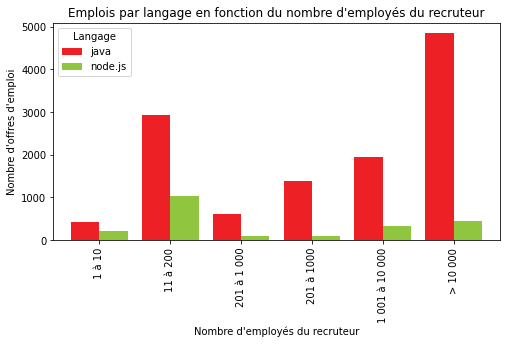

In [216]:
df_by_csp.rename_axis(cat, axis="columns").plot(kind='bar', figsize=(8, 4), width=.8, color=bar_colors)
plt.title(f"Emplois par {cat.lower()} en fonction du nombre d'employés du recruteur")
plt.ylabel("Nombre d'offres d'emploi")
plt.xlabel("Nombre d'employés du recruteur")
plt.xticks(rotation=90)

In [217]:
# Building relative version of the plot for easier comparison
# -> where is each company FOCUSING / which companies are its targets?
# (even small companies should appear here as they have a target strategy)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1 à 10'),
  Text(1, 0, '11 à 200'),
  Text(2, 0, '201 à 1 000'),
  Text(3, 0, '201 à 1000'),
  Text(4, 0, '1 001 à 10 000'),
  Text(5, 0, '> 10 000')])

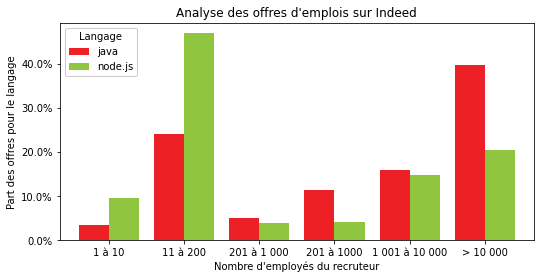

In [218]:
import matplotlib.ticker as mtick

color = "black"
params = {"text.color": color,
          "ytick.color" : color,
          "xtick.color" : color,
          "axes.labelcolor" : color,
          "axes.edgecolor" : color}
plt.rcParams.update(params)

df_by_csp_relative = 100 * df_by_csp / df_by_csp.sum()
ax = df_by_csp_relative.rename_axis(cat, axis="columns").plot(kind='bar', figsize=(8.5, 4), width=.8, color=bar_colors)
plt.title("Analyse des offres d'emplois sur Indeed")
plt.ylabel("Part des offres pour le " + cat.lower())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.patch.set_alpha(0) 
plt.xlabel("Nombre d'employés du recruteur")
ax.get_legend().get_frame().set_alpha(1)  # 0 or 1
plt.xticks(rotation=0)

In [195]:
# Nombre d'offres par entreprises
df.groupby('csp').count()['title']

csp
AWS         719
Azure       870
GCP         854
Scaleway     57
Name: title, dtype: int64

In [196]:
# Nombre d'offres avec infos sur entreprises
df.groupby('csp').count()['employees']

csp
AWS         420
Azure       476
GCP         564
Scaleway     23
Name: employees, dtype: int64

In [197]:
df_by_csp.sum()

csp
AWS         2218.0
Azure       8412.0
GCP         3320.0
Scaleway     133.0
dtype: float64